# Data Loading and Definition

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
error = pd.read_csv('PdM_errors.csv')
error.head()

,datetime,machineID,errorID
0,2015-01-03 07:00:00,1,error1
1,2015-01-03 20:00:00,1,error3
2,2015-01-04 06:00:00,1,error5
3,2015-01-10 15:00:00,1,error4
4,2015-01-22 10:00:00,1,error4


In [3]:
fail = pd.read_csv('PdM_failures.csv')
fail.head()

,datetime,machineID,failure
0,2015-01-05 06:00:00,1,comp4
1,2015-03-06 06:00:00,1,comp1
2,2015-04-20 06:00:00,1,comp2
3,2015-06-19 06:00:00,1,comp4
4,2015-09-02 06:00:00,1,comp4


In [4]:
machine = pd.read_csv('PdM_machines.csv')
machine.head()

,machineID,model,age
0,1,model3,18
1,2,model4,7
2,3,model3,8
3,4,model3,7
4,5,model3,2


In [5]:
maint = pd.read_csv('PdM_maint.csv')
maint.head()

,datetime,machineID,comp
0,2014-06-01 06:00:00,1,comp2
1,2014-07-16 06:00:00,1,comp4
2,2014-07-31 06:00:00,1,comp3
3,2014-12-13 06:00:00,1,comp1
4,2015-01-05 06:00:00,1,comp4


In [6]:
tele = pd.read_csv('PdM_telemetry.csv')
tele.head()

,datetime,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,157.610021,435.376873,111.886648,25.990511


# EDA

Based on the characteristics for each dataset, here are some EDAs to perform:

**I have made all graphs separately so that they will be inserted easily into slides or reports. If needed, let me know if you want to show a few pictures together vertically or horizontally. - Kehl**

1. **Errors Dataset:**
   - **Error Frequency:** Calculate the frequency of different types of errors to understand which ones occur most frequently.
   - **Temporal Analysis:** Analyze error occurrences over time to identify patterns or trends.
   - **Machine Error Frequency:** Calculate the frequency of different machine units.

2. **Failures Dataset:**
   - **Failure Distribution:** Understand the distribution of different failure types to identify the most common or severe failures.
   - **Failure Frequency Trends:** Analyze failure occurrences over time and their relationships with specific conditions or maintenance activities.

3. **Maintenance Records Dataset:**
   - **Maintenance Type Analysis:** Explore the frequency and types of maintenance performed to understand if certain types of maintenance reduce errors or failures.
   - **Maintenance Schedule vs. Real Needs:** Investigate if there's a correlation between scheduled maintenance and actual machine conditions or breakdowns.

4. **Machine Conditions Dataset:**
   - **Machine Age Analysis:** Investigate how machine age correlates with errors, failures, or maintenance requirements.
   - **Model-Based Insights:** Compare error rates, failure occurrences, or maintenance needs across different machine models to identify potential patterns.



5. **Telemetry Dataset:**
   - **Working Condition Trends:** Find out the machine conditions when it gets errors, and see if that is particularly different from normal times.

## Data Cleaning

In [7]:
error['datetime'] = pd.to_datetime(error['datetime'])
error['month'] = error['datetime'].dt.month
error['day'] = error['datetime'].dt.day
error['hour'] = error['datetime'].dt.hour
error = error[['datetime', 'month', 'day', 'hour', 'machineID', 'errorID']]
error.head()

,datetime,month,day,hour,machineID,errorID
0,2015-01-03 07:00:00,1,3,7,1,error1
1,2015-01-03 20:00:00,1,3,20,1,error3
2,2015-01-04 06:00:00,1,4,6,1,error5
3,2015-01-10 15:00:00,1,10,15,1,error4
4,2015-01-22 10:00:00,1,22,10,1,error4


In [8]:
fail['datetime'] = pd.to_datetime(fail['datetime'])
fail['month'] = fail['datetime'].dt.month
fail['day'] = fail['datetime'].dt.day
fail['hour'] = fail['datetime'].dt.hour
fail = fail[['datetime', 'month', 'day', 'hour', 'machineID', 'failure']]
fail.head()

,datetime,month,day,hour,machineID,failure
0,2015-01-05 06:00:00,1,5,6,1,comp4
1,2015-03-06 06:00:00,3,6,6,1,comp1
2,2015-04-20 06:00:00,4,20,6,1,comp2
3,2015-06-19 06:00:00,6,19,6,1,comp4
4,2015-09-02 06:00:00,9,2,6,1,comp4


In [9]:
maint['datetime'] = pd.to_datetime(maint['datetime'])
maint['month'] = maint['datetime'].dt.month
maint['day'] = maint['datetime'].dt.day
maint['hour'] = maint['datetime'].dt.hour
maint = maint[['datetime', 'month', 'day', 'hour', 'machineID', 'comp']]
maint = maint.rename(columns={'comp': 'failure'}) # rename the column to align with "fail"
maint.head()

,datetime,month,day,hour,machineID,failure
0,2014-06-01 06:00:00,6,1,6,1,comp2
1,2014-07-16 06:00:00,7,16,6,1,comp4
2,2014-07-31 06:00:00,7,31,6,1,comp3
3,2014-12-13 06:00:00,12,13,6,1,comp1
4,2015-01-05 06:00:00,1,5,6,1,comp4


In [10]:
tele['datetime'] = pd.to_datetime(tele['datetime'])
tele['month'] = tele['datetime'].dt.month
tele['day'] = tele['datetime'].dt.day
tele['hour'] = tele['datetime'].dt.hour
tele = tele[['datetime', 'month', 'day', 'hour', 'machineID', 'volt', 'rotate', 'pressure', 'vibration']]
tele.head()

,datetime,month,day,hour,machineID,volt,rotate,pressure,vibration
0,2015-01-01 06:00:00,1,1,6,1,176.217853,418.504078,113.077935,45.087686
1,2015-01-01 07:00:00,1,1,7,1,162.879223,402.747490,95.460525,43.413973
2,2015-01-01 08:00:00,1,1,8,1,170.989902,527.349825,75.237905,34.178847
3,2015-01-01 09:00:00,1,1,9,1,162.462833,346.149335,109.248561,41.122144
4,2015-01-01 10:00:00,1,1,10,1,157.610021,435.376873,111.886648,25.990511


## Error

### Divide Data by Machine, Error, and Time

In [11]:
error_log_by_machine, error_log_by_error = error.groupby('machineID').count()[['datetime']].rename(columns={'datetime': 'errorCount'}), error.groupby('errorID').count()[['datetime']].rename(columns={'datetime': 'errorCount'})

In [12]:
error_log_by_month, error_log_by_day, error_log_by_hour = error.groupby('month').count()[['datetime']].rename(columns={'datetime': 'errorCount'}), error.groupby('day').count()[['datetime']].rename(columns={'datetime': 'errorCount'}), error.groupby('hour').count()[['datetime']].rename(columns={'datetime': 'errorCount'})

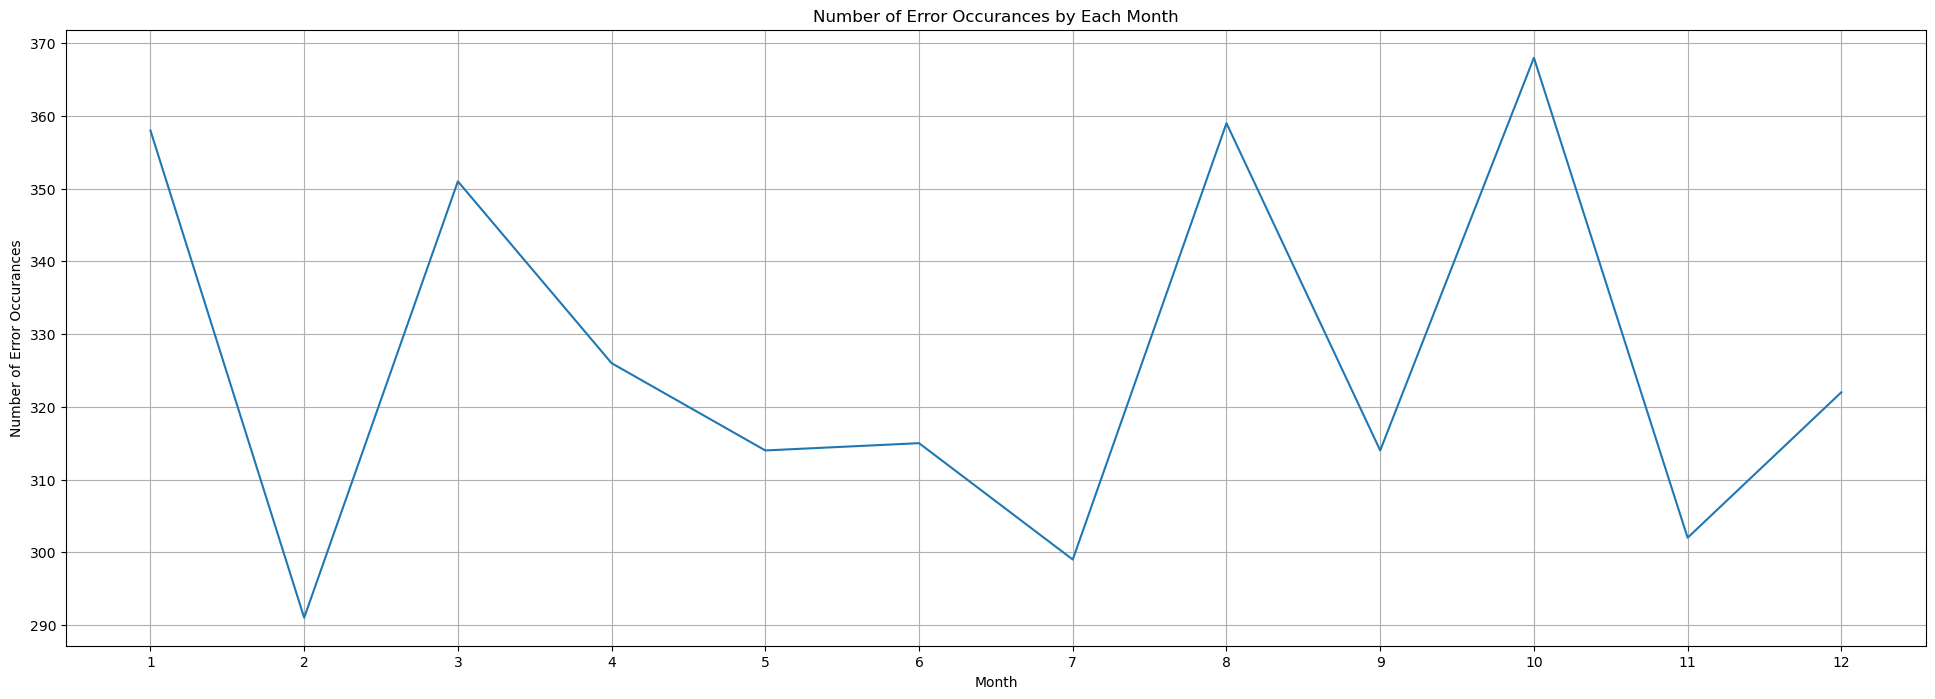

In [13]:
plt.figure(figsize=(24,8))
plt.plot(error_log_by_month.index, error_log_by_month)
plt.xticks(range(1,len(error_log_by_month.index)+1), error_log_by_month.index)
plt.ylabel('Number of Error Occurances')
plt.xlabel('Month')
plt.title('Number of Error Occurances by Each Month')
plt.grid()
plt.show()

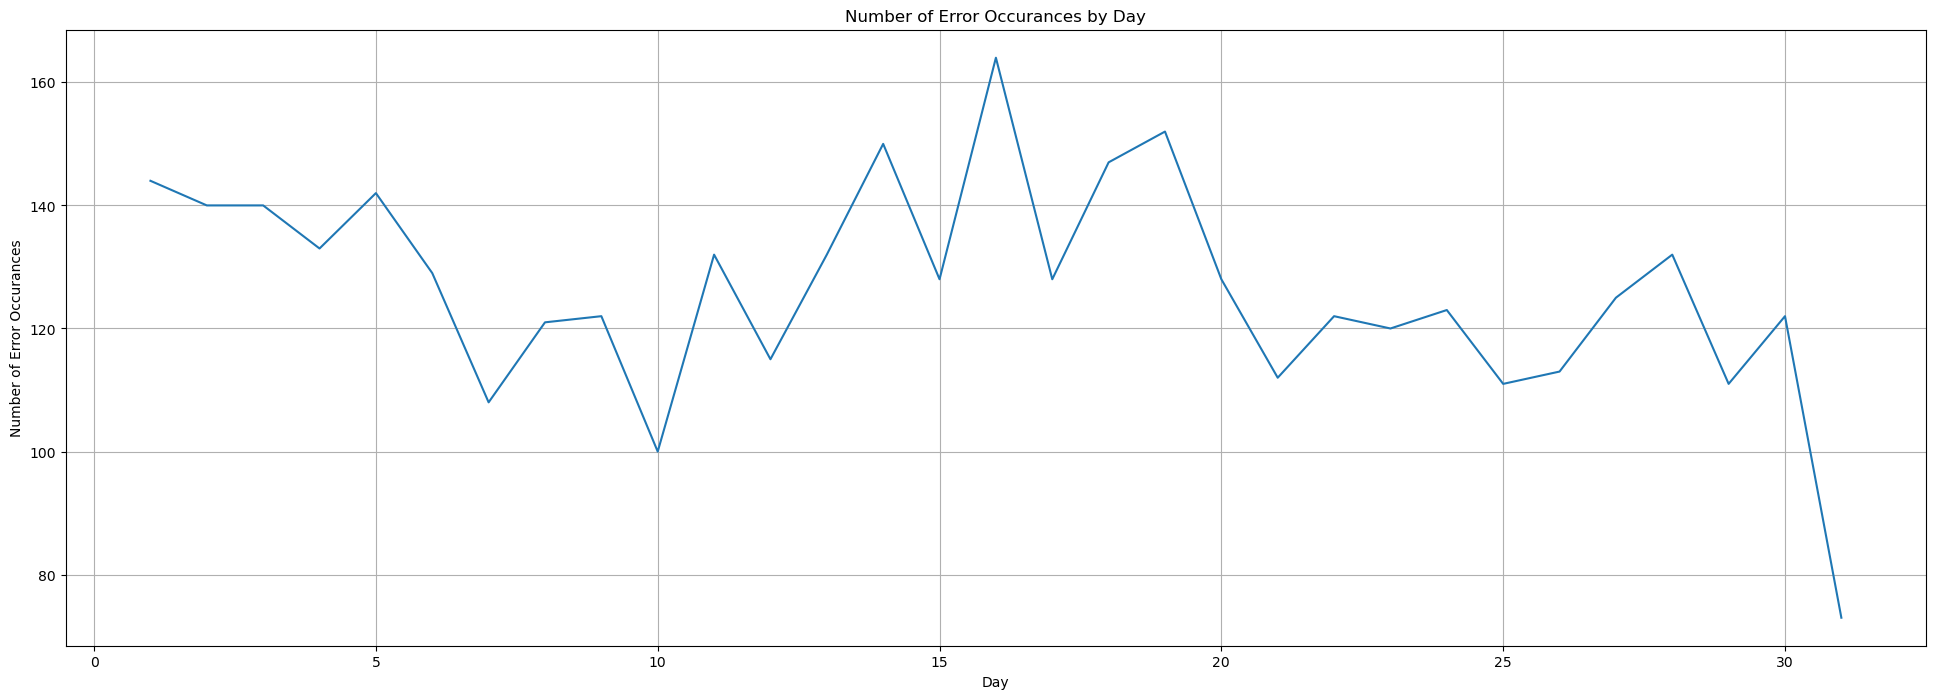

In [14]:
plt.figure(figsize=(24,8))
plt.plot(error_log_by_day.index, error_log_by_day)
plt.ylabel('Number of Error Occurances')
plt.xlabel('Day')
plt.title('Number of Error Occurances by Day')
plt.grid()
plt.show()

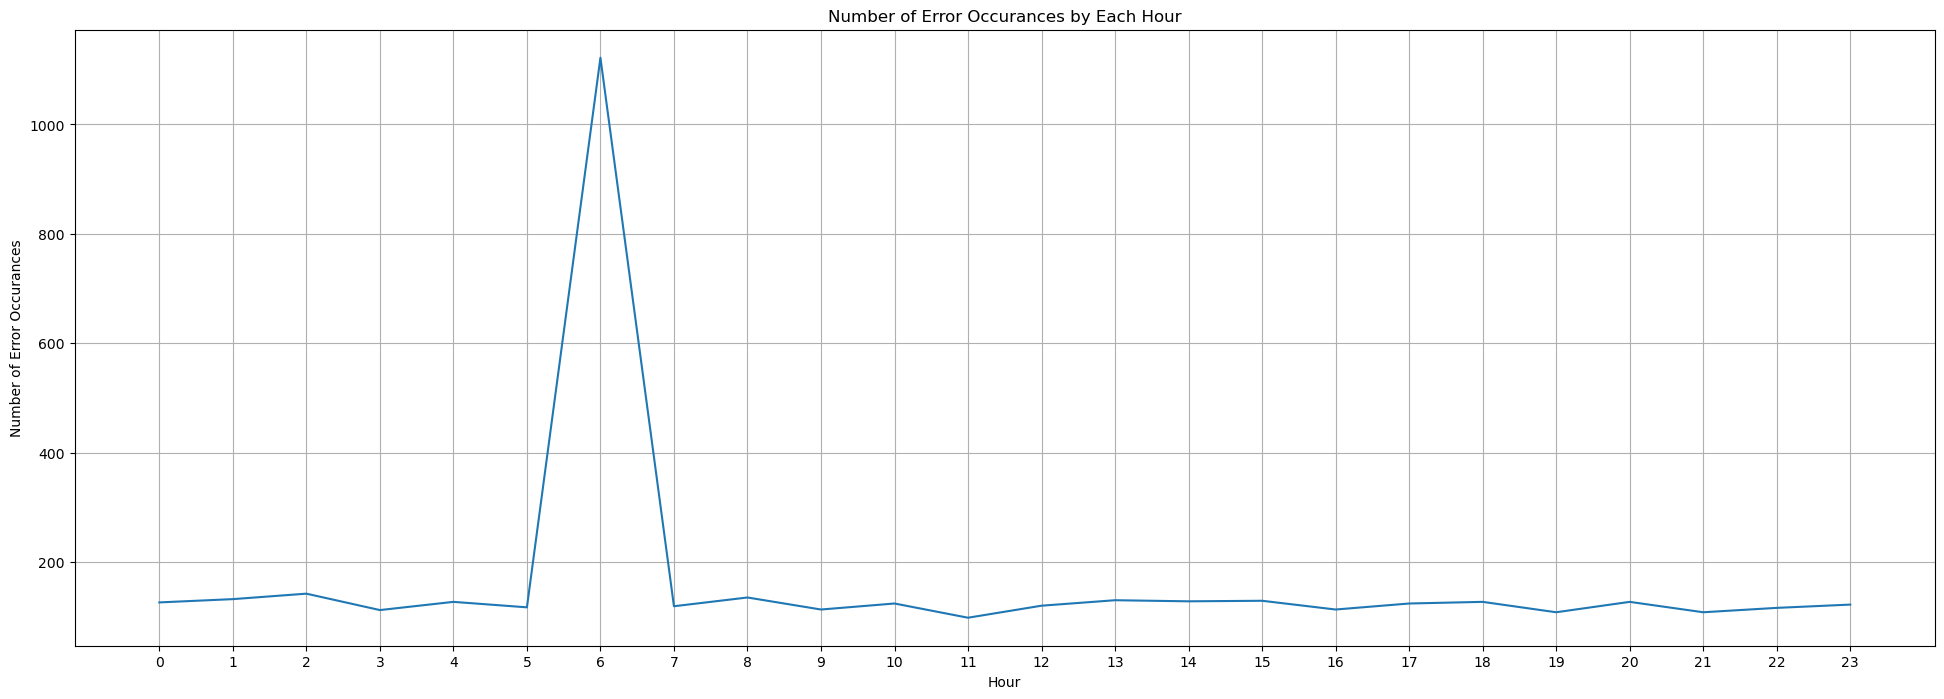

In [15]:
plt.figure(figsize=(24,8))
plt.plot(error_log_by_hour.index, error_log_by_hour)
plt.xticks(range(len(error_log_by_hour.index)), error_log_by_hour.index)
plt.ylabel('Number of Error Occurances')
plt.xlabel('Hour')
plt.title('Number of Error Occurances by Each Hour')
plt.grid()
plt.show()

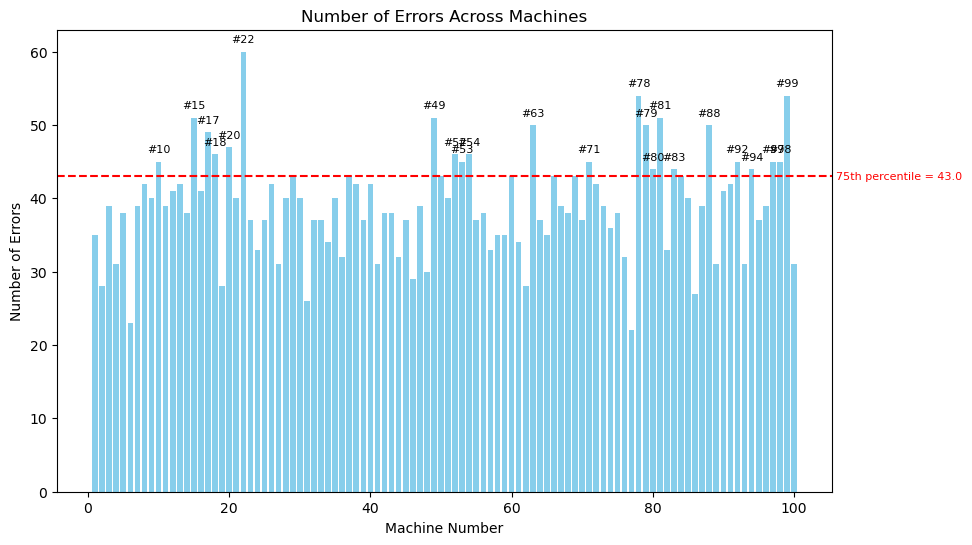

In [16]:
percentile_75 = np.percentile(error_log_by_machine['errorCount'], 75)

plt.figure(figsize=(10, 6))
plt.bar(error_log_by_machine.index, error_log_by_machine['errorCount'], color='skyblue')
for i, num_error in enumerate(error_log_by_machine['errorCount'].tolist()):
    if num_error > percentile_75:
        plt.annotate(f'#{i+1}', (i, num_error), xytext=(5, 5), textcoords='offset points',
                     ha='center', va='bottom', fontsize=8, color='black')
plt.axhline(y=percentile_75, color='red', linestyle='--', label='75th percentile')
plt.annotate(f'75th percentile = {percentile_75}', (len(error_log_by_machine['errorCount']) + 2, percentile_75),
             xytext=(20, 0), textcoords='offset points', ha='left', va='center', fontsize=8, color='red')
plt.xlabel('Machine Number')
plt.ylabel('Number of Errors')
plt.title('Number of Errors Across Machines')

plt.show()

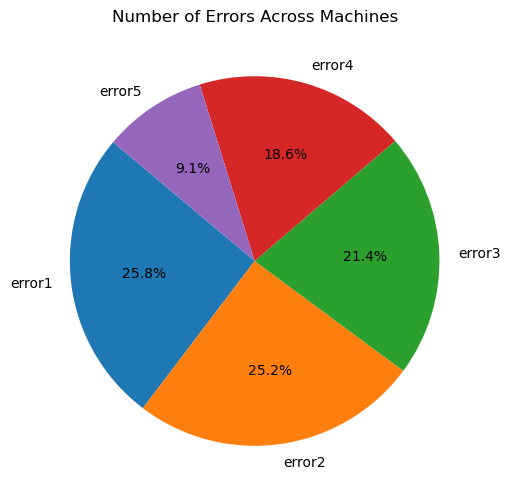

In [17]:
plt.figure(figsize=(10, 6))
plt.pie(error_log_by_error['errorCount'], labels=error_log_by_error.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Errors Across Machines')

plt.show()

### Tentative Discovery

1. There seems to be noise in large time scale, but the majority of errors happen at 6 o'clock.

2. You may explore if the specific error-dense machines have particular characteristics.

3. Different types of errors happen with different frequencies, you may link error types to other characteristics.

4. Seems like there are more errors in the middle of the month.

## Failure

### Divide Data by Machine, Failure, and Time

In [18]:
fail_log_by_machine, fail_log_by_fail = fail.groupby('machineID').count()[['datetime']].rename(columns={'datetime': 'failCount'}), fail.groupby('failure').count()[['datetime']].rename(columns={'datetime': 'failCount'})

In [19]:
fail_log_by_month, fail_log_by_day, fail_log_by_hour = fail.groupby('month').count()[['datetime']].rename(columns={'datetime': 'failCount'}), fail.groupby('day').count()[['datetime']].rename(columns={'datetime': 'failCount'}), fail.groupby('hour').count()[['datetime']].rename(columns={'datetime': 'failCount'})

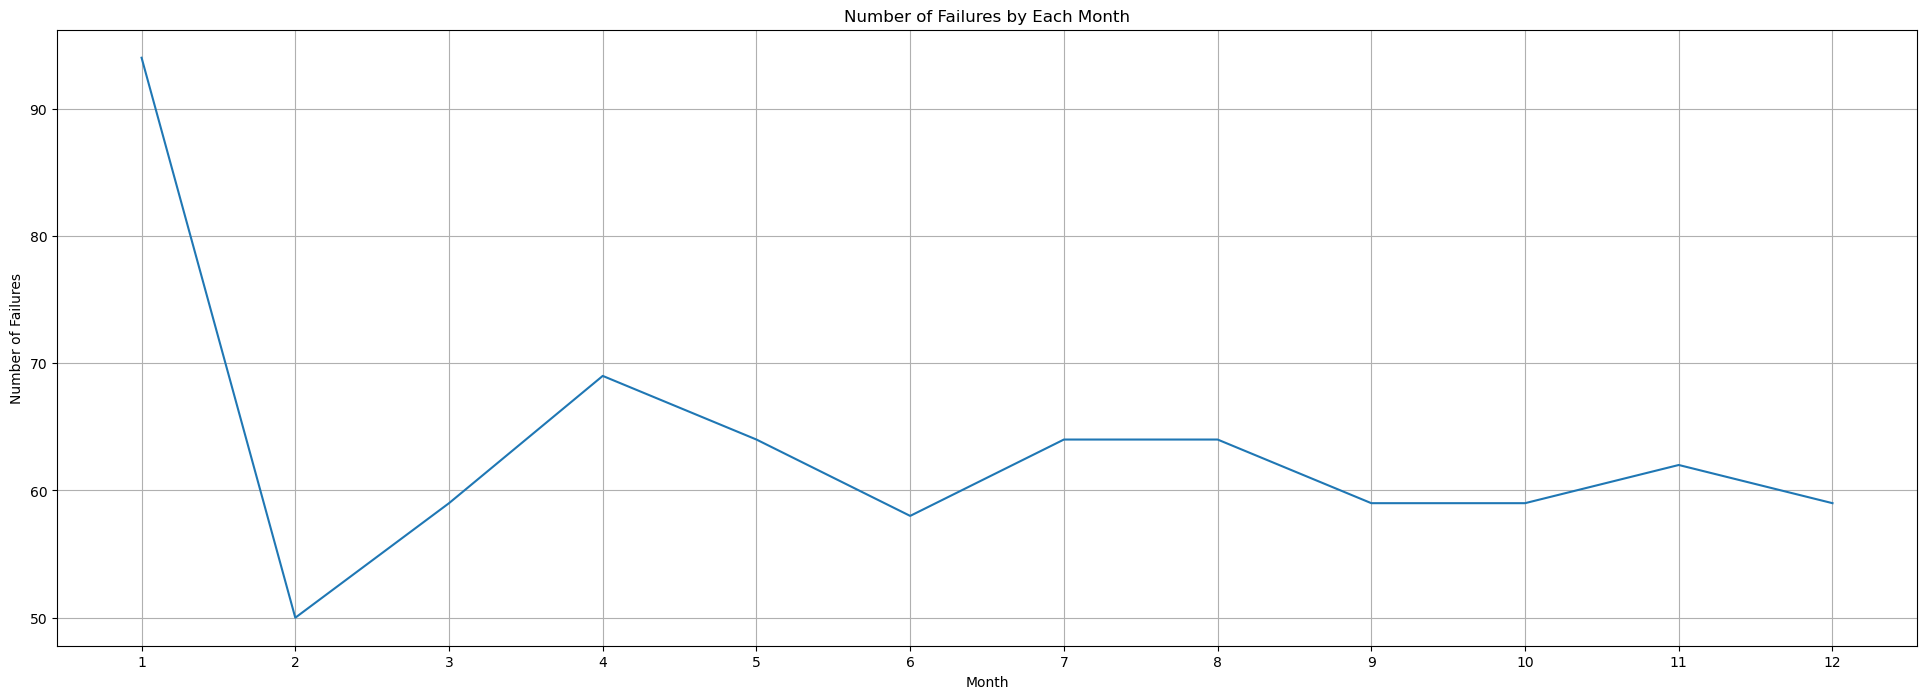

In [20]:
plt.figure(figsize=(24,8))
plt.plot(fail_log_by_month.index, fail_log_by_month)
plt.xticks(range(1,len(fail_log_by_month.index)+1), fail_log_by_month.index)
plt.ylabel('Number of Failures')
plt.xlabel('Month')
plt.title('Number of Failures by Each Month')
plt.grid()
plt.show()

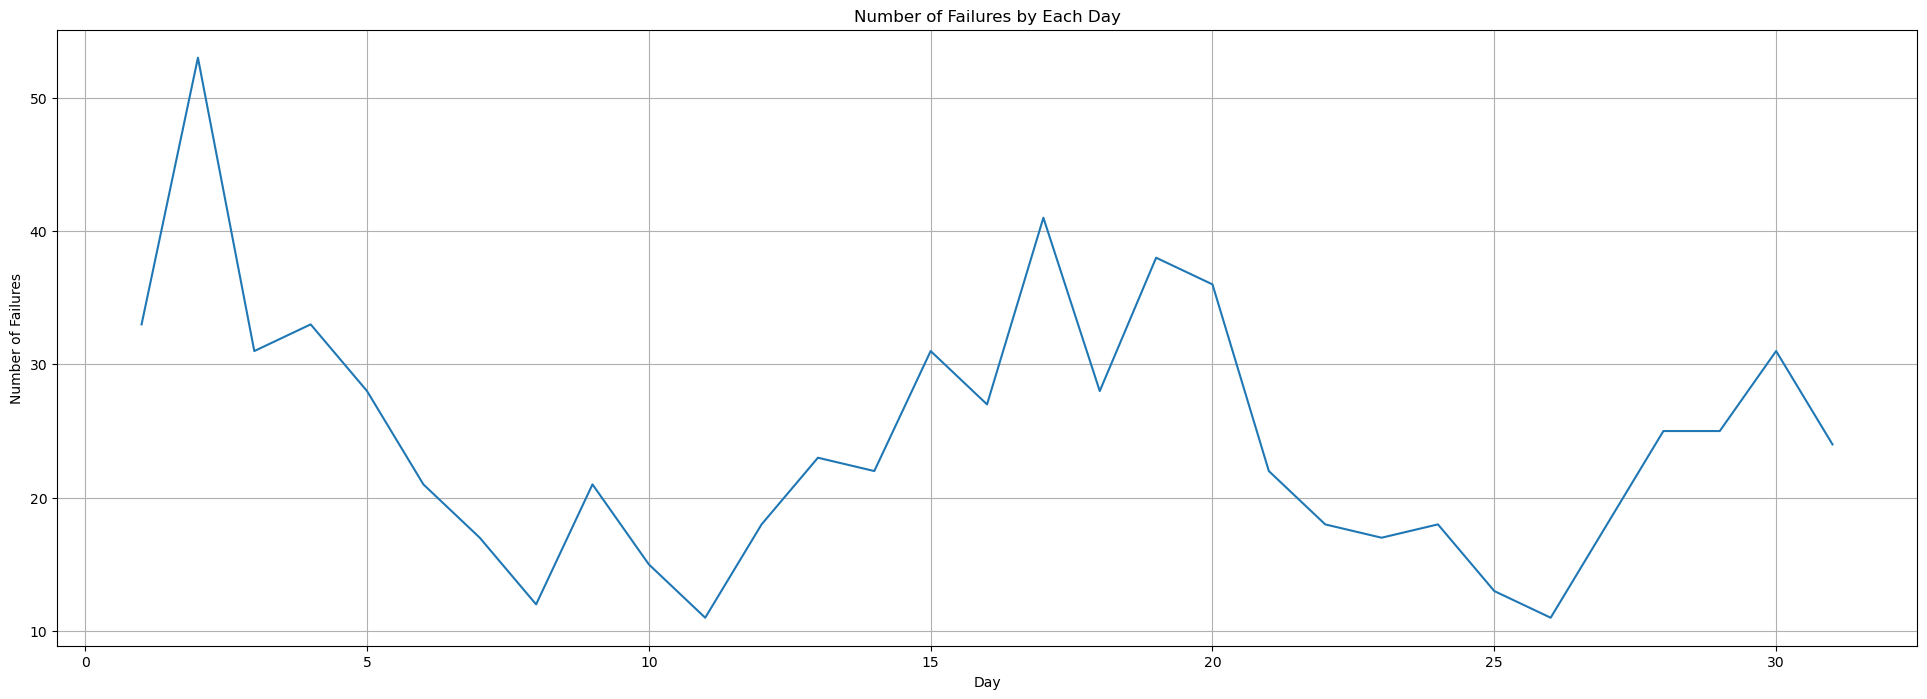

In [21]:
plt.figure(figsize=(24,8))
plt.plot(fail_log_by_day.index, fail_log_by_day)
plt.ylabel('Number of Failures')
plt.xlabel('Day')
plt.title('Number of Failures by Each Day')
plt.grid()
plt.show()

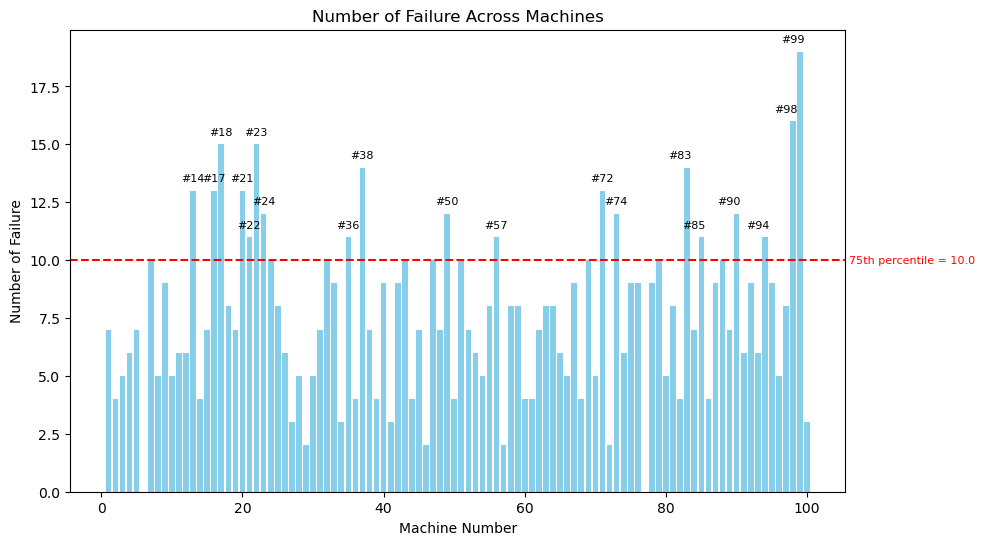

In [22]:
percentile_75 = np.percentile(fail_log_by_machine['failCount'], 75)

plt.figure(figsize=(10, 6))
plt.bar(fail_log_by_machine.index, fail_log_by_machine['failCount'], color='skyblue')
for i, num_error in enumerate(fail_log_by_machine['failCount'].tolist()):
    if num_error > percentile_75:
        plt.annotate(f'#{i+3}', (i, num_error), xytext=(10, 5), textcoords='offset points',
                     ha='center', va='bottom', fontsize=8, color='black')
plt.axhline(y=percentile_75, color='red', linestyle='--', label='75th percentile')
plt.annotate(f'75th percentile = {percentile_75}', (len(fail_log_by_machine['failCount']) + 2, percentile_75),
             xytext=(30, 0), textcoords='offset points', ha='left', va='center', fontsize=8, color='red')
plt.xlabel('Machine Number')
plt.ylabel('Number of Failure')
plt.title('Number of Failure Across Machines')

plt.show()

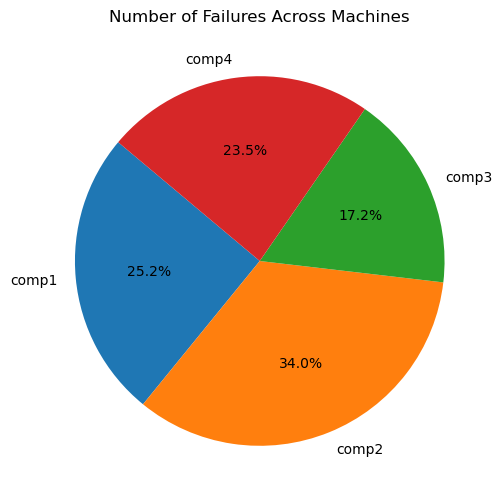

In [23]:
plt.figure(figsize=(10, 6))
plt.pie(fail_log_by_fail['failCount'], labels=fail_log_by_fail.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Failures Across Machines')

plt.show()

### Tentative Discovery

1. Failures do not occur (or be detected) continously, so there is no use looking at hours.

2. More failures happen in the beginning and middle of each month.

## Maintenance

### Devide Data by Machine, Failure, and Time

In [24]:
maint_log_by_machine, maint_log_by_fail = maint.groupby('machineID').count()[['datetime']].rename(columns={'datetime': 'maintCount'}), fail.groupby('failure').count()[['datetime']].rename(columns={'datetime': 'maintCount'})

In [25]:
maint_log_by_month, maint_log_by_day, maint_log_by_hour = maint.groupby('month').count()[['datetime']].rename(columns={'datetime': 'maintCount'}), maint.groupby('day').count()[['datetime']].rename(columns={'datetime': 'maintCount'}), maint.groupby('hour').count()[['datetime']].rename(columns={'datetime': 'maintCount'})

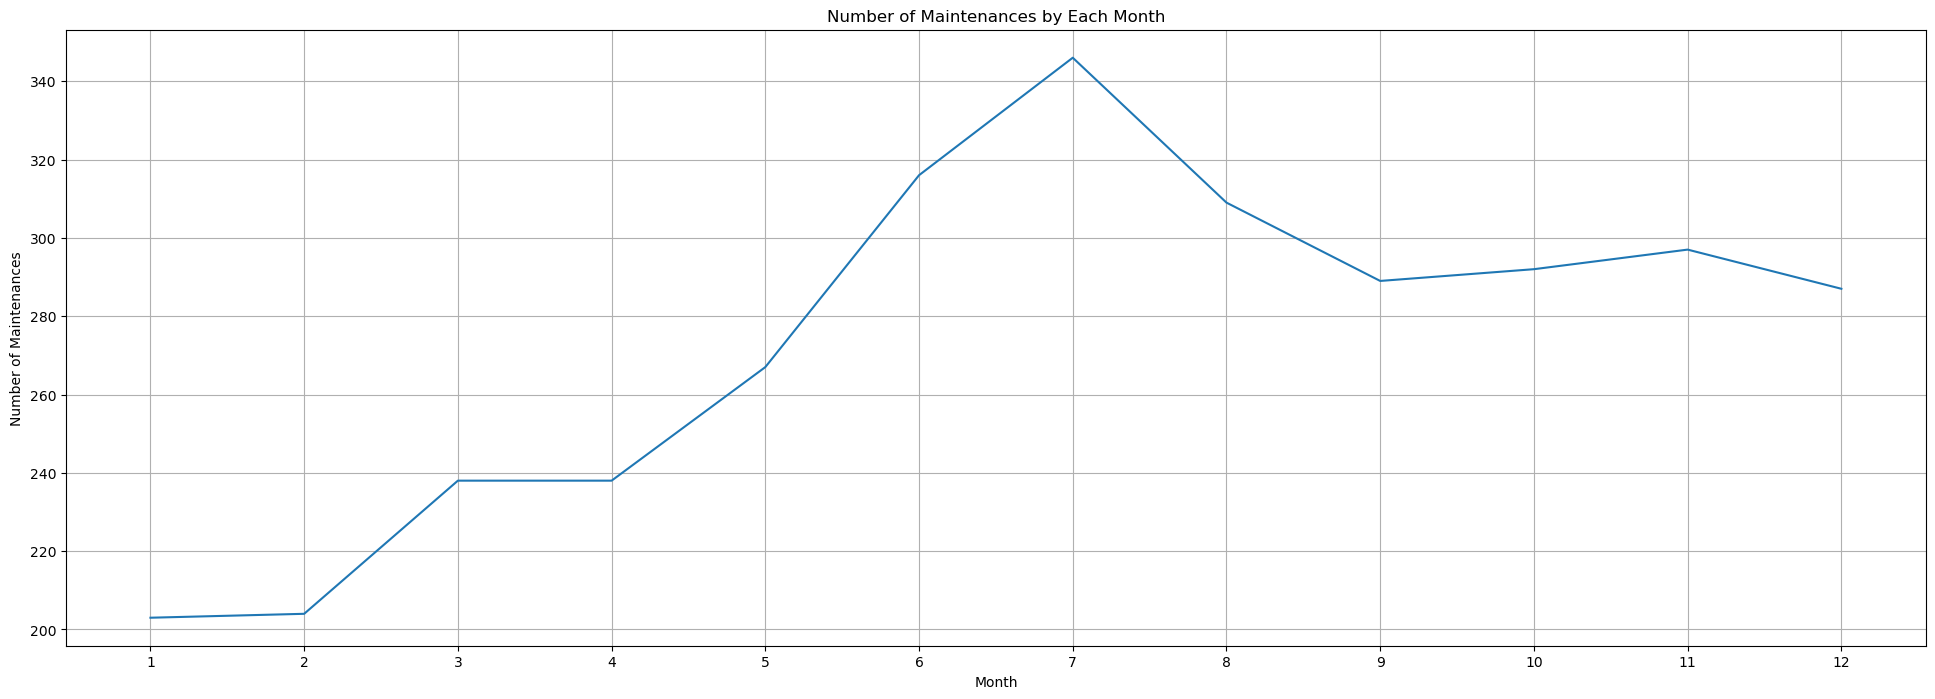

In [26]:
plt.figure(figsize=(24,8))
plt.plot(maint_log_by_month.index, maint_log_by_month)
plt.xticks(range(1,len(maint_log_by_month.index)+1), maint_log_by_month.index)
plt.ylabel('Number of Maintenances')
plt.xlabel('Month')
plt.title('Number of Maintenances by Each Month')
plt.grid()
plt.show()

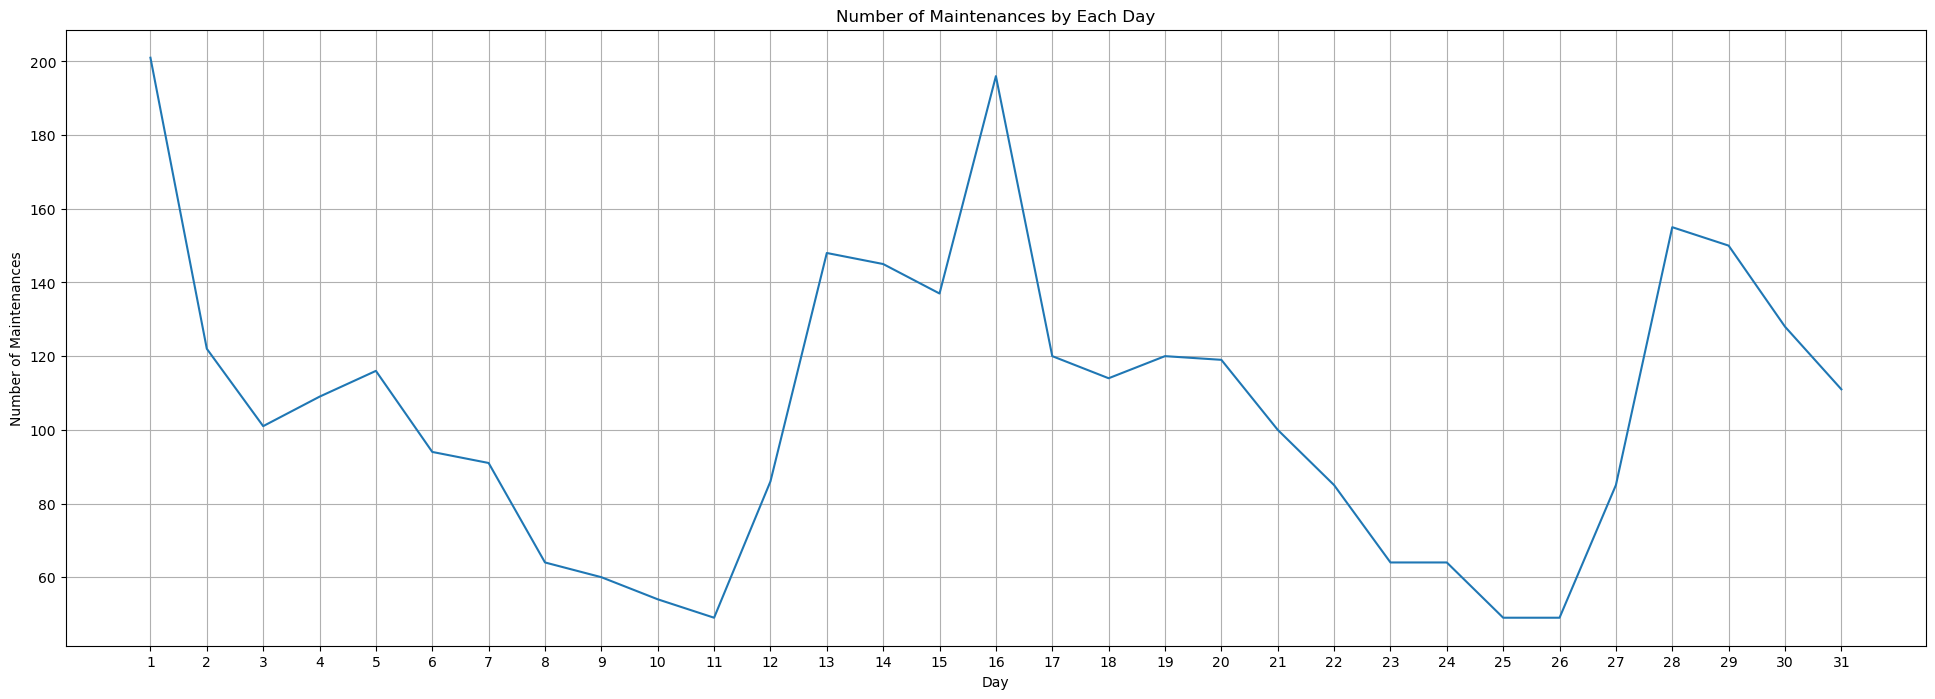

In [27]:
plt.figure(figsize=(24,8))
plt.plot(maint_log_by_day.index, maint_log_by_day)
plt.xticks(range(1,len(maint_log_by_day.index)+1), maint_log_by_day.index)
plt.ylabel('Number of Maintenances')
plt.xlabel('Day')
plt.title('Number of Maintenances by Each Day')
plt.grid()
plt.show()

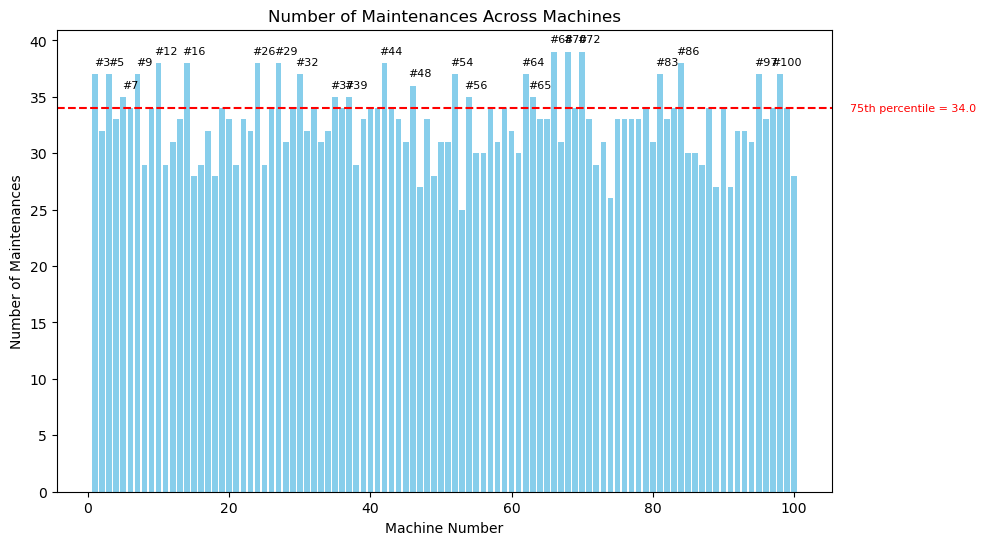

In [28]:
percentile_75 = np.percentile(maint_log_by_machine['maintCount'], 75)

plt.figure(figsize=(10, 6))
plt.bar(maint_log_by_machine.index, maint_log_by_machine['maintCount'], color='skyblue')
for i, num_error in enumerate(maint_log_by_machine['maintCount'].tolist()):
    if num_error > percentile_75:
        plt.annotate(f'#{i+3}', (i, num_error), xytext=(10, 5), textcoords='offset points',
                     ha='center', va='bottom', fontsize=8, color='black')
plt.axhline(y=percentile_75, color='red', linestyle='--', label='75th percentile')
plt.annotate(f'75th percentile = {percentile_75}', (len(maint_log_by_machine['maintCount']) + 2, percentile_75),
             xytext=(30, 0), textcoords='offset points', ha='left', va='center', fontsize=8, color='red')
plt.xlabel('Machine Number')
plt.ylabel('Number of Maintenances')
plt.title('Number of Maintenances Across Machines')

plt.show()

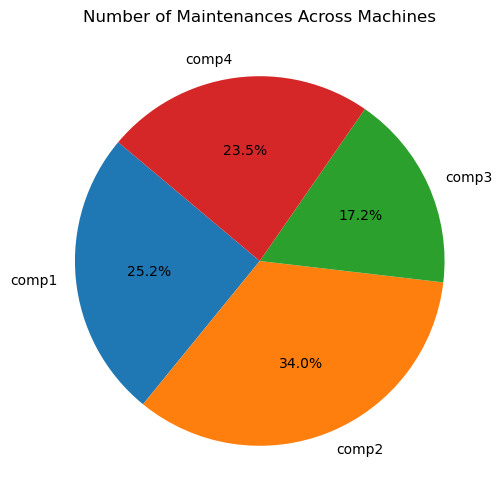

In [29]:
plt.figure(figsize=(10, 6))
plt.pie(maint_log_by_fail['maintCount'], labels=maint_log_by_fail.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Maintenances Across Machines')

plt.show()

### Tentative Discovery

1. Maintenance can be corresponded directly to failures.

2. Maintenance grows as the year approaches an end, seems to happen periodically every 10 days.

3. Number of maintenance does not vary largely across different machines.

## Machine Condition

### Divide Machine into Models, Compare Age with Error and Failure

In [30]:
model_counts = machine.groupby('model').count()[['age']].rename(columns={'age': 'modelCount'})
model_counts

,modelCount
model,
model1,16
model2,17
model3,35
model4,32


In [31]:
age_by_model = machine.groupby('model')[['age']].mean().rename(columns={'age': 'ageAvg'})
age_by_model

,ageAvg
model,
model1,12.250000
model2,12.764706
model3,12.028571
model4,9.343750


In [32]:
merged_table = pd.merge(error_log_by_machine, fail_log_by_machine, on='machineID')
merged_table = pd.merge(merged_table, maint_log_by_machine, on='machineID')
merged_table = pd.merge(merged_table, machine[['machineID', 'age']], on='machineID')
merged_table

,machineID,errorCount,failCount,maintCount,age
0,1,35,7,37,18
1,2,28,4,32,7
2,3,39,5,37,8
3,4,31,6,33,7
4,5,38,7,35,2
...,...,...,...,...,...
93,96,39,5,33,10
94,97,45,8,34,14
95,98,45,16,37,20
96,99,54,19,34,14


In [33]:
merged_table.set_index('machineID', inplace=True)

<Figure size 6000x1200 with 0 Axes>

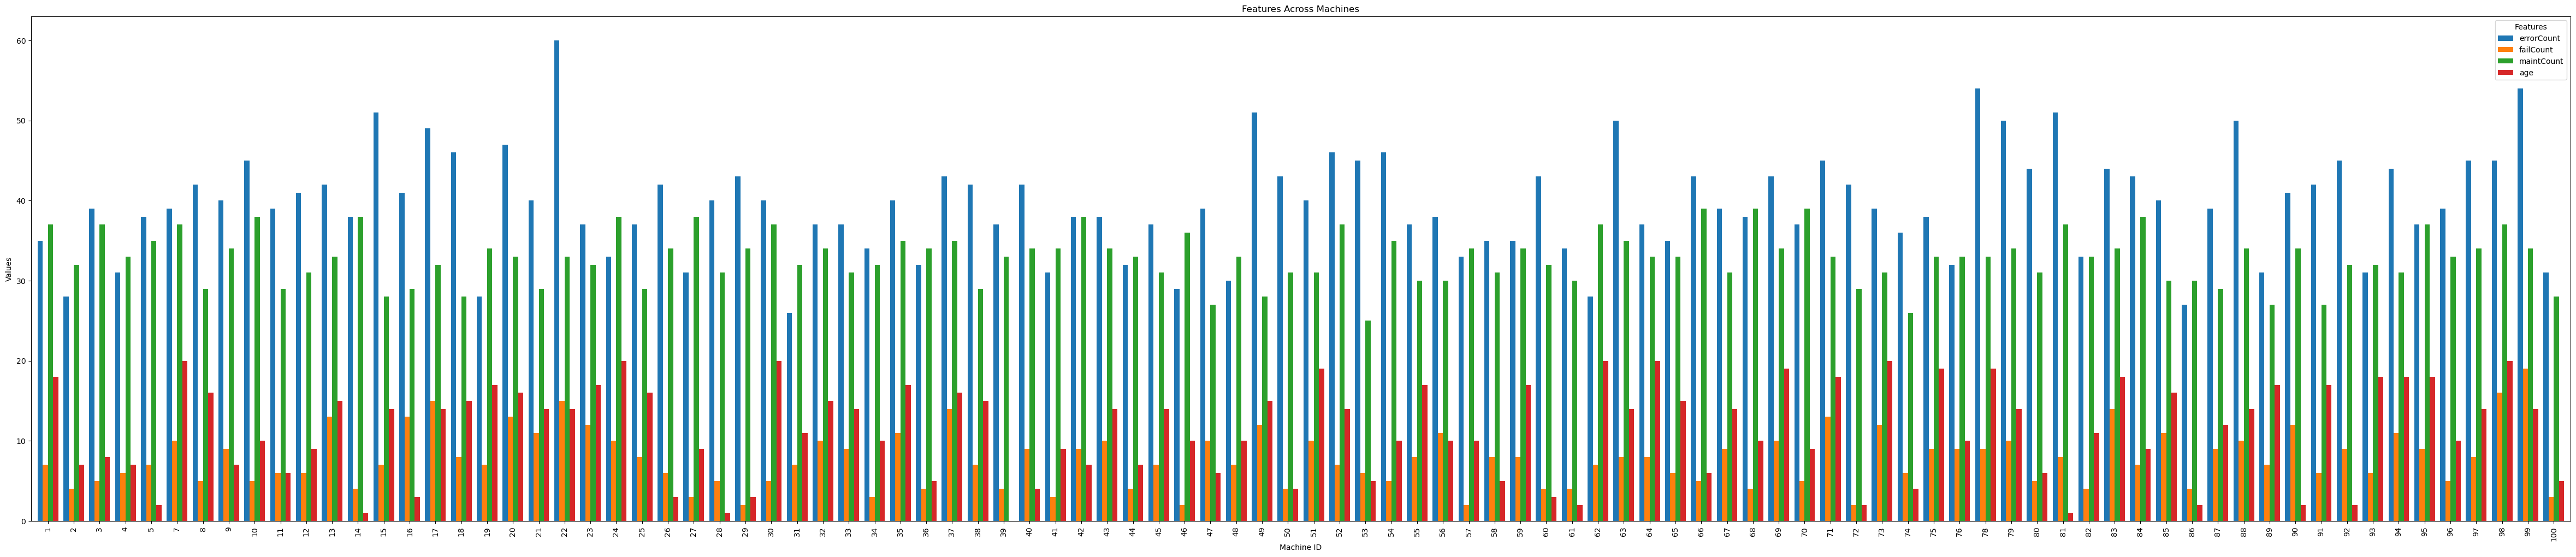

In [34]:
plt.figure(figsize=(60, 12))
merged_table.plot(kind='bar', width=0.8, figsize=(60, 12))
plt.xlabel('Machine ID')
plt.ylabel('Values')
plt.title('Features Across Machines')
plt.legend(title='Features')
plt.show()

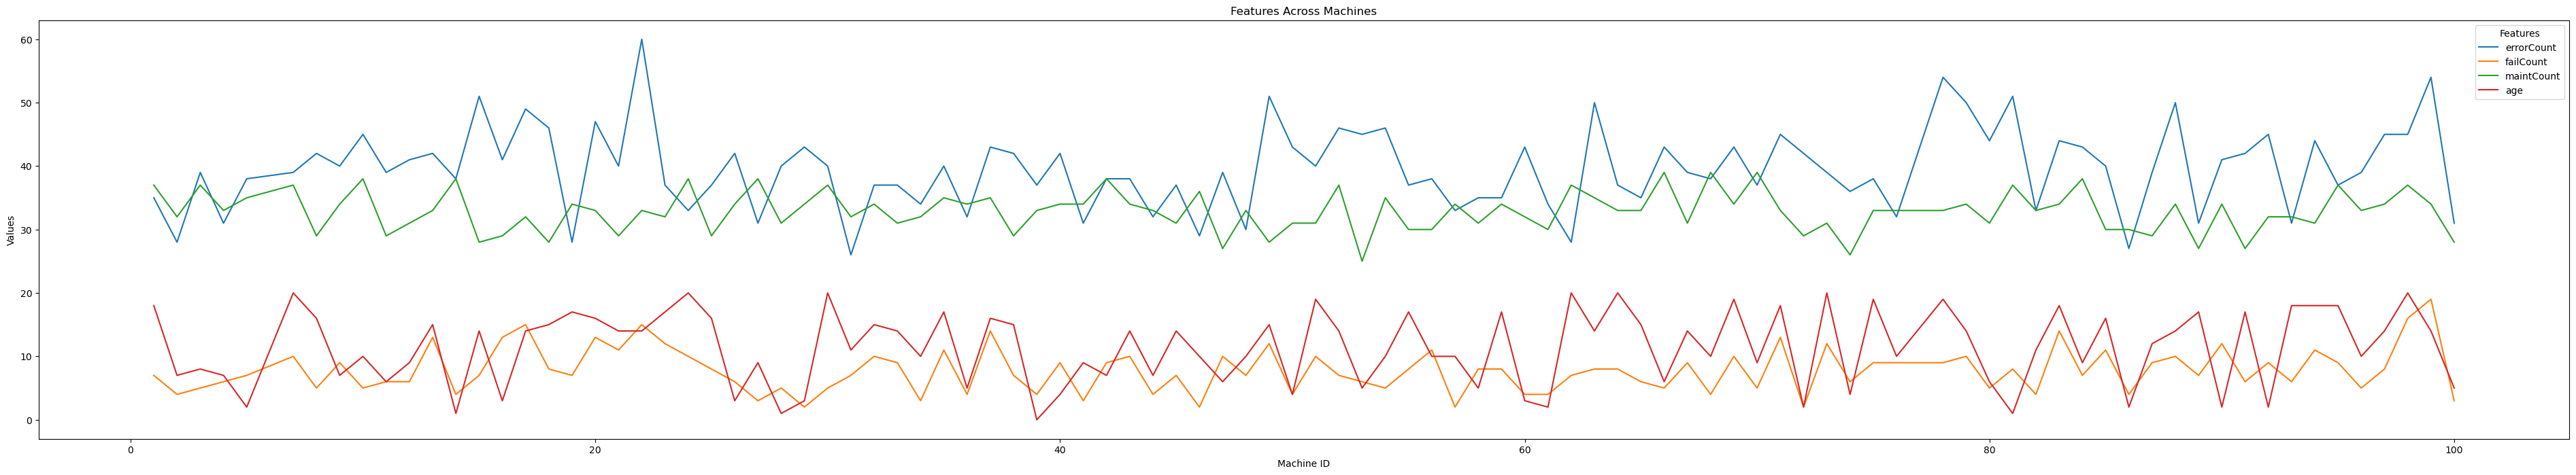

In [35]:
plt.figure(figsize=(48, 8))

plt.plot(merged_table.index, merged_table['errorCount'], label='errorCount')
plt.plot(merged_table.index, merged_table['failCount'], label='failCount')
plt.plot(merged_table.index, merged_table['maintCount'], label='maintCount')
plt.plot(merged_table.index, merged_table['age'], label='age')
plt.xlabel('Machine ID')
plt.ylabel('Values')
plt.title('Features Across Machines')
plt.legend(title='Features')
plt.show()

### Tentative Discovery

1. Error and Age tend to move correlatively.

2. Failure and Maintenance tend to move correlatively.

3. You can run logistic regressions or classifications on models to see real correlation.

## Telemetry

In [36]:
error_tele = pd.merge(tele, error, on=['machineID', 'datetime'], how='inner')
error_tele.head()

,datetime,month_x,day_x,hour_x,machineID,volt,rotate,pressure,vibration,month_y,day_y,hour_y,errorID
0,2015-01-03 07:00:00,1,3,7,1,175.213280,486.494804,104.432962,47.875804,1,3,7,error1
1,2015-01-03 20:00:00,1,3,20,1,163.783704,520.582694,97.160984,56.442488,1,3,20,error3
2,2015-01-04 06:00:00,1,4,6,1,165.010140,448.468838,97.709630,48.238941,1,4,6,error5
3,2015-01-10 15:00:00,1,10,15,1,159.251350,462.691198,108.232985,31.200028,1,10,15,error4
4,2015-01-22 10:00:00,1,22,10,1,152.789008,448.457864,98.709506,33.642445,1,22,10,error4


### Tentative Discovery

There is not much to do with telemetry. However, combining error with telemetry can discover specific readings at times of error. This could help you run regressions to see if certain readings are related to general error or a specific error.

Let us take a look at the errors of machine 1 and the corresponding dates

In [38]:
error_dates_1 = error[error['machineID']==1]['datetime'].dt.date
error_dates_1

0     2015-01-03
1     2015-01-03
2     2015-01-04
3     2015-01-10
4     2015-01-22
5     2015-01-25
6     2015-01-27
7     2015-03-03
8     2015-03-05
9     2015-03-20
10    2015-03-26
11    2015-03-31
12    2015-04-19
13    2015-04-19
14    2015-04-29
15    2015-05-04
16    2015-05-12
17    2015-05-21
18    2015-05-24
19    2015-05-25
20    2015-06-09
21    2015-06-18
22    2015-06-23
23    2015-08-23
24    2015-08-30
25    2015-09-01
26    2015-09-13
27    2015-09-15
28    2015-10-01
29    2015-10-15
30    2015-10-16
31    2015-10-16
32    2015-10-16
33    2015-11-10
34    2015-12-15
Name: datetime, dtype: object

In [39]:
# Similarly, we will take a look at the failures of machine 1 and the corresponding dates
failure_dates_1 = fail[fail['machineID']==1]['datetime'].dt.date
failure_dates_1

0    2015-01-05
1    2015-03-06
2    2015-04-20
3    2015-06-19
4    2015-09-02
5    2015-10-17
6    2015-12-16
Name: datetime, dtype: object

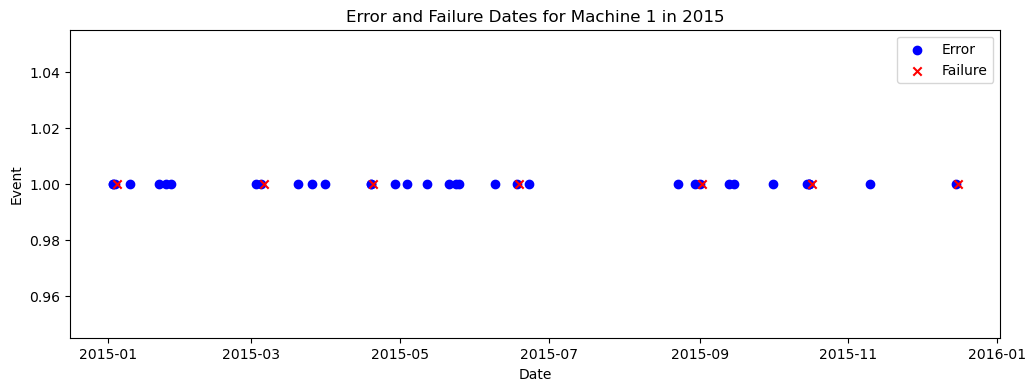

In [40]:
import matplotlib.pyplot as plt

# Convert date strings to datetime objects
error_dates_1 = pd.to_datetime(error_dates_1)
failure_dates_1 = pd.to_datetime(failure_dates_1)

plt.figure(figsize=(12, 4))
# Create a plot with blue markers for errors and red markers for failures
plt.scatter(error_dates_1, [1] * len(error_dates_1), color='blue', marker='o', label='Error')
plt.scatter(failure_dates_1, [1] * len(failure_dates_1), color='red', marker='x', label='Failure')

# Set plot labels and legend
plt.xlabel('Date')
plt.ylabel('Event')
plt.title('Error and Failure Dates for Machine 1 in 2015')
plt.legend()

# Show the plot
plt.show()

It can be seen that every failure is preceeded by one or more errors. So, errors are the primary indicators of failures. If we can predict the errors using telemetry, we can avoid the corresponding failures.

Now, let us look the telemetry data before and after a failure. Consider the failure occured on '2015-10-17'. There are three errors on the previous day. Let's plot the telemetry values one week before and after this failure.

In [41]:
# Maintenance done for machine 1
maint_dates_1 = maint[maint['machineID']==1]['datetime'].dt.date[4:]
maint_dates_1

4     2015-01-05
5     2015-01-05
6     2015-01-20
7     2015-01-20
8     2015-02-04
9     2015-02-04
10    2015-02-19
11    2015-03-06
12    2015-03-21
13    2015-04-05
14    2015-04-20
15    2015-05-05
16    2015-05-05
17    2015-05-20
18    2015-06-04
19    2015-06-19
20    2015-06-19
21    2015-07-04
22    2015-07-19
23    2015-08-03
24    2015-09-02
25    2015-09-02
26    2015-09-17
27    2015-10-02
28    2015-10-02
29    2015-10-17
30    2015-10-17
31    2015-11-01
32    2015-11-01
33    2015-11-16
34    2015-12-01
35    2015-12-16
36    2015-12-31
Name: datetime, dtype: object

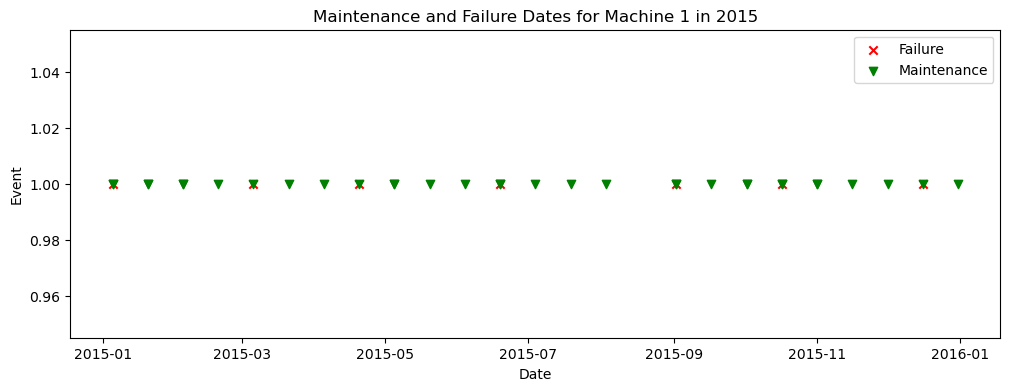

In [42]:
# plot to see the dates of maintenance and error dates and failure dates

# Convert date strings to datetime objects
error_dates_1 = pd.to_datetime(error_dates_1)
failure_dates_1 = pd.to_datetime(failure_dates_1)
maint_dates_1 = pd.to_datetime(maint_dates_1)

plt.figure(figsize=(12, 4))
# Create a plot with blue markers for errors and red markers for failures
#plt.scatter(error_dates_1, [1] * len(error_dates_1), color='blue', marker='o', label='Error')
plt.scatter(failure_dates_1, [1] * len(failure_dates_1), color='red', marker='x', label='Failure')
plt.scatter(maint_dates_1, [1] * len(maint_dates_1), color='green', marker='v', label='Maintenance')

# Set plot labels and legend
plt.xlabel('Date')
plt.ylabel('Event')
plt.title('Maintenance and Failure Dates for Machine 1 in 2015')
plt.legend()

# Show the plot
plt.show()

Let us take a look at the telemetry readings around the dates of failure and error

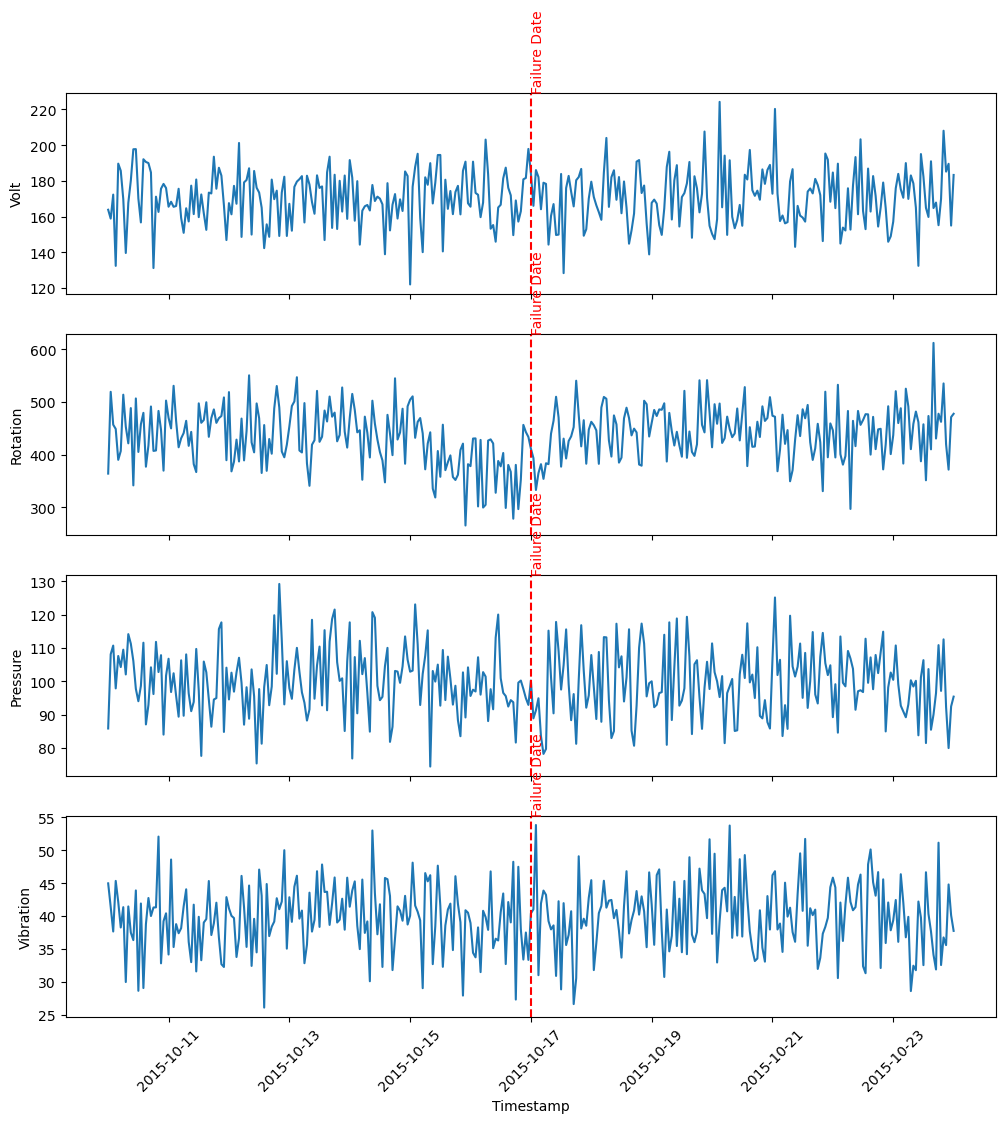

In [43]:
telemetry_1 = tele[tele['machineID'] == 1]

fail_date = pd.to_datetime('2015-10-17') # Date of failure

date_range = pd.date_range(start=fail_date - pd.Timedelta(days=7), end=fail_date + pd.Timedelta(days=7), freq='H')

telemetry_1_fail = telemetry_1[telemetry_1['datetime'].isin(date_range)]

# Plot volt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize = (12,12))

ax[0].plot('datetime', 'volt', data=telemetry_1_fail)
ax[0].set_ylabel("Volt")

# PLot rotate
ax[1].plot('datetime', 'rotate', data=telemetry_1_fail)
ax[1].set_ylabel("Rotation")

# Plot pressure 
ax[2].plot('datetime', 'pressure', data=telemetry_1_fail)
ax[2].set_ylabel("Pressure")

# Plot vibration 
ax[3].plot('datetime', 'vibration', data=telemetry_1_fail)
ax[3].set_ylabel("Vibration")
ax[3].set_xlabel("Timestamp")
ax[3].tick_params(axis='x', rotation=45)

# Add a red vertical line at the failure date
for a in ax:
    a.axvline(fail_date, color='red', linestyle='--', label='Failure Date')
    a.text(fail_date, a.get_ylim()[1], 'Failure Date', color='red', rotation=90, verticalalignment='bottom')
    
plt.show()

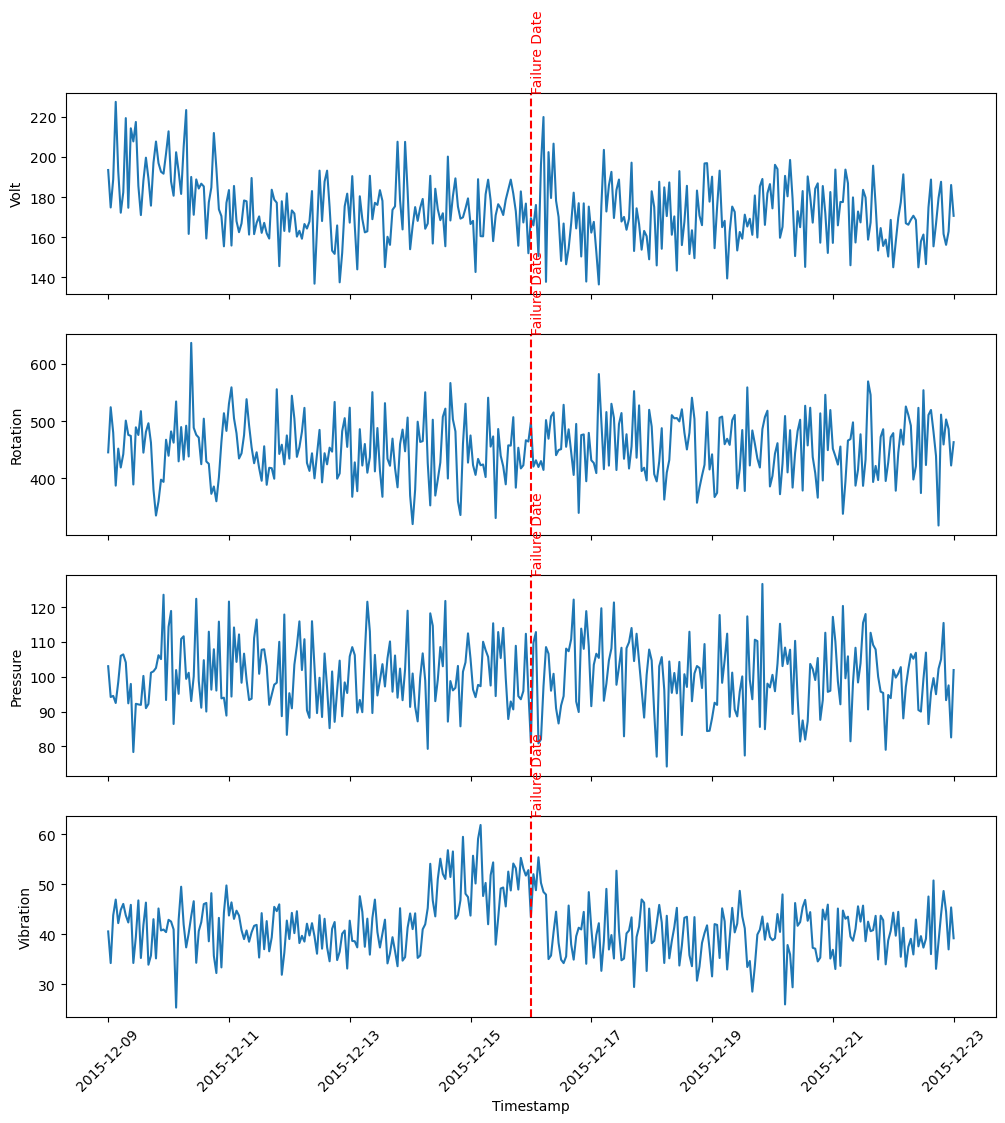

In [45]:
# For some other failure date

fail_date = pd.to_datetime('2015-12-16') # Date of failure

date_range = pd.date_range(start=fail_date - pd.Timedelta(days=7), end=fail_date + pd.Timedelta(days=7), freq='H')

telemetry_1_fail = telemetry_1[telemetry_1['datetime'].isin(date_range)]

# Plot volt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize = (12,12))

ax[0].plot('datetime', 'volt', data=telemetry_1_fail)
ax[0].set_ylabel("Volt")

# PLot rotate
ax[1].plot('datetime', 'rotate', data=telemetry_1_fail)
ax[1].set_ylabel("Rotation")

# Plot pressure 
ax[2].plot('datetime', 'pressure', data=telemetry_1_fail)
ax[2].set_ylabel("Pressure")

# Plot vibration 
ax[3].plot('datetime', 'vibration', data=telemetry_1_fail)
ax[3].set_ylabel("Vibration")
ax[3].set_xlabel("Timestamp")
ax[3].tick_params(axis='x', rotation=45)

# Add a red vertical line at the failure date
for a in ax:
    a.axvline(fail_date, color='red', linestyle='--', label='Failure Date')
    a.text(fail_date, a.get_ylim()[1], 'Failure Date', color='red', rotation=90, verticalalignment='bottom')
    
plt.show()

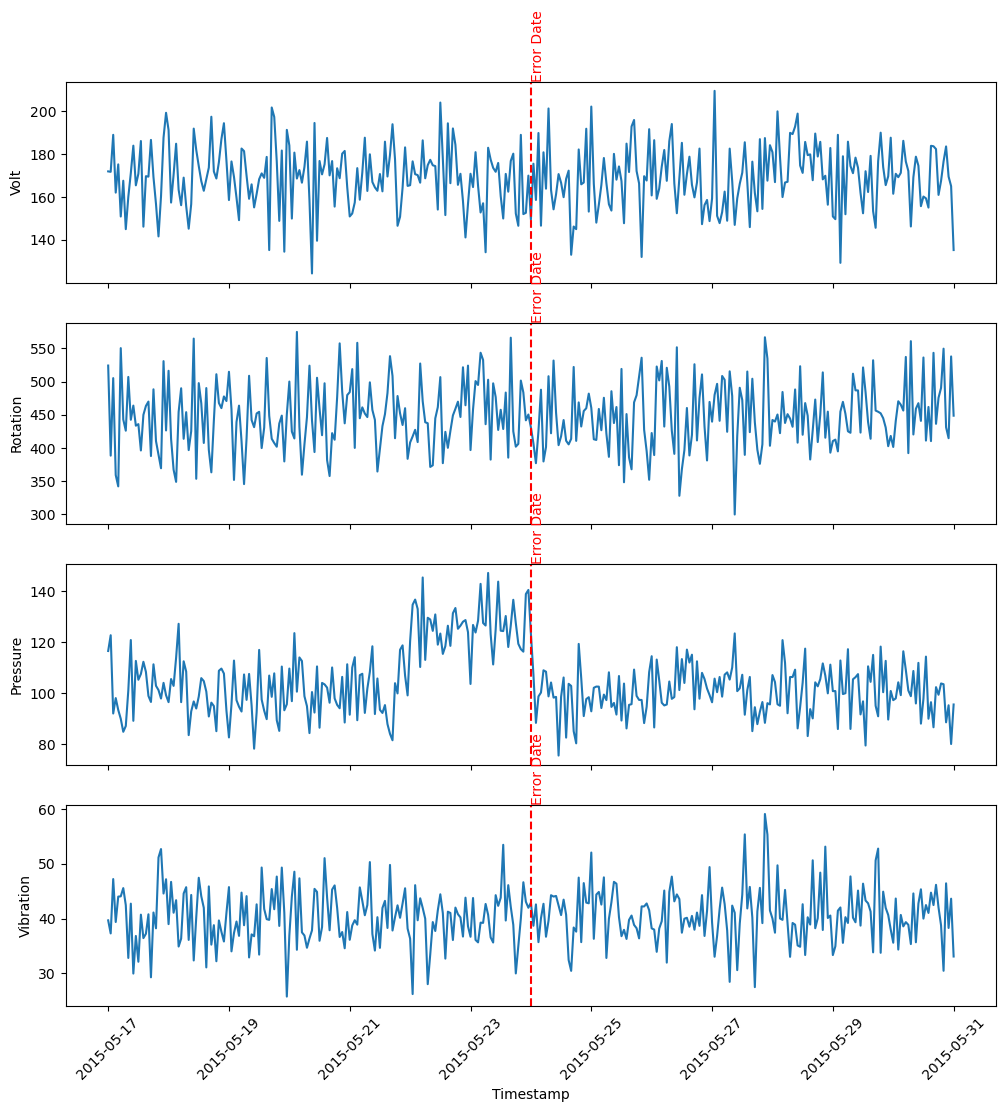

In [47]:
# Let us consider error date

error_date = pd.to_datetime('2015-05-24') # Date of error

date_range = pd.date_range(start=error_date - pd.Timedelta(days=7), end=error_date + pd.Timedelta(days=7), freq='H')

telemetry_1_error = telemetry_1[telemetry_1['datetime'].isin(date_range)]

# Plot volt
fig, ax = plt.subplots(nrows=4, sharex=True, figsize = (12,12))

ax[0].plot('datetime', 'volt', data=telemetry_1_error)
ax[0].set_ylabel("Volt")

# PLot rotate
ax[1].plot('datetime', 'rotate', data=telemetry_1_error)
ax[1].set_ylabel("Rotation")

# Plot pressure 
ax[2].plot('datetime', 'pressure', data=telemetry_1_error)
ax[2].set_ylabel("Pressure")

# Plot vibration 
ax[3].plot('datetime', 'vibration', data=telemetry_1_error)
ax[3].set_ylabel("Vibration")
ax[3].set_xlabel("Timestamp")
ax[3].tick_params(axis='x', rotation=45)

# Add a red vertical line at the failure date
for a in ax:
    a.axvline(error_date, color='red', linestyle='--', label='Error Date')
    a.text(error_date, a.get_ylim()[1], 'Error Date', color='red', rotation=90, verticalalignment='bottom')
    
plt.show()

We can see that before every error or failure, there is an anamoly in atleast one of the telemetry readings. So, these readings can be used to predict any future errors and failures.